In [1]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model as md
from torch.utils.data import DataLoader

In [2]:
device = "cuda"

In [3]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [4]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([
                                               dt.ToTensor(),
                                               dt.Rescale(96),
                                               dt.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])                                               
                                           ]))
# TODO: change the normalization parameters

In [5]:
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

0 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
1 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
2 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
3 torch.Size([32, 3, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


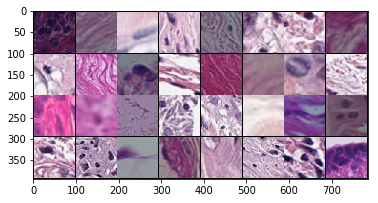

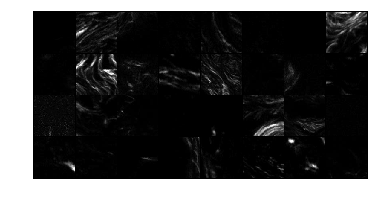

In [6]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [7]:
print('===> Building model')
model = md.Net().to("cuda")
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)








===> Building model


In [ ]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        
        loss = criterion(model(input), target.float())
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [ ]:
# def test():
#     avg_psnr = 0
#     with torch.no_grad():
#         for batch in testing_data_loader:
#             input, target = batch[0].to(device), batch[1].to(device)

#             prediction = model(input)
#             mse = criterion(prediction, target)
#             psnr = 10 * log10(1 / mse.item())
#             avg_psnr += psnr
#     print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


In [ ]:
# def checkpoint(epoch):
#     model_out_path = "model_epoch_{}.pth".format(epoch)
#     torch.save(model, model_out_path)
#     print("Checkpoint saved to {}".format(model_out_path))

In [ ]:
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

===> Epoch[1](0/25343): Loss: 2.2144
===> Epoch[1](50/25343): Loss: 2.0084
===> Epoch[1](100/25343): Loss: 2.1201
===> Epoch[1](150/25343): Loss: 2.0169
===> Epoch[1](200/25343): Loss: 2.0474
===> Epoch[1](250/25343): Loss: 2.0585
===> Epoch[1](300/25343): Loss: 2.0904
===> Epoch[1](350/25343): Loss: 2.1094
===> Epoch[1](400/25343): Loss: 2.1203
===> Epoch[1](450/25343): Loss: 2.0711
===> Epoch[1](500/25343): Loss: 2.0334
===> Epoch[1](550/25343): Loss: 2.0840
===> Epoch[1](600/25343): Loss: 2.1048
===> Epoch[1](650/25343): Loss: 2.0426
===> Epoch[1](700/25343): Loss: 2.0943
===> Epoch[1](750/25343): Loss: 2.0398
===> Epoch[1](800/25343): Loss: 2.0762
===> Epoch[1](850/25343): Loss: 2.1065
===> Epoch[1](900/25343): Loss: 2.0657
===> Epoch[1](950/25343): Loss: 2.1324
===> Epoch[1](1000/25343): Loss: 2.0820
===> Epoch[1](1050/25343): Loss: 2.1047
===> Epoch[1](1100/25343): Loss: 2.0688
===> Epoch[1](1150/25343): Loss: 2.0330
===> Epoch[1](1200/25343): Loss: 2.0506
===> Epoch[1](1250/2534